# Email Spam Detection

# Problem Statement :

    We've all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email 
    that is sent to a massive number of users at one time, frequently containing cryptic messages, 
    scams, or most dangerously, phishing content.
    In this Project, use Python to build an email spam detector. Then, use machine learning to train 
    the spam detector to recognize and classify emails into spam and non-spam.

# Procedure :
    Step 1 : Import Libraries and Dataset
    
    Step 2 : Data Pre-processing
            1. Data Type and conversion
            2. Removing Irrelevant Columns
            3. Identifying & Treatment Missing Value 
            
    Step 3 : Data Partition
            
    Step 4 : Deep Learning            
    
    Step 5 : Model Building

             Conclusion

# Step 1 :- Import Libraries and Dataset

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
import pandas as pd
df = pd.read_csv (r"C:\Users\admin\Desktop\Machine Learning\Oasis Infobyte Internship\Task 4\spam.csv", encoding = "latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Step 2 :- Data Pre-Processing 

1. Data Type and conversion
2. Removing Irrelevant Columns
3. Missing Values
4. Label Encoding

### 2.1 Data Type and Conversion

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### 2.2 Removing Irrelevant Columns

In [5]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [6]:
df.rename(columns = {'v1':'Target', 'v2':'Text'}, inplace = True)

In [7]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### 2.3 Handeling Missing Values

In [8]:
# replace the null values with a null string
df = df.where((pd.notnull(df)),'')

In [9]:
# checking the number of rows and columns in the dataframe
df.shape

(5572, 2)

### 2.4 Label Encoding

In [10]:
# label spam mail as 0;  ham mail as 1;

df.loc[df['Target'] == 'spam', 'Target',] = 0
df.loc[df['Target'] == 'ham', 'Target',] = 1

<AxesSubplot:ylabel='Target'>

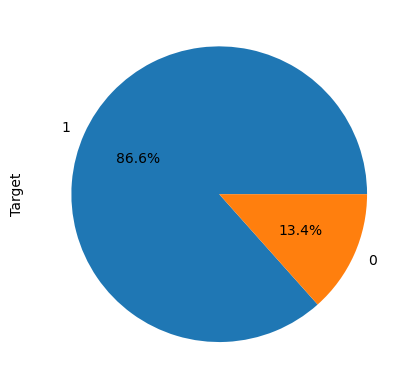

In [11]:
# series of counts
spam_Class_count = df.Target.value_counts()
spam_Class_count.plot.pie(autopct="%.1f%%")

# Step 3 : Data Partition

In [12]:
# separating the data as texts and label
X = df['Text']
Y = df['Target']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [14]:
X_train.shape

(4457,)

In [15]:
X_test.shape

(1115,)

# Step 4 : Deep Learning

In [16]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

# Step 5 : Model Building

In [17]:
model = LogisticRegression()

In [18]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

In [19]:
# prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [20]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9661207089970832


In [21]:
# prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [22]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9623318385650225


In [23]:
input_mail = ["I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail


# CONCLUSION

* We can conclude that we used Logistic Regression for model performance and we got 96 % Train and 95 % Test Accuracy.
* We used TF-IDF vectorizer for spam and ham classfication
* Most of data included with ham mails.
* We can used this algorithm for spam and ham prediction in future.